# In this notebook, we will explore fundamental image processing techniques using OpenCV, including image representation, manipulation, filtering, histograms, and denoising.


### Importing Required Packages

In [10]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

### 1. Image Representation

Images can be represented in different formats like JPEG, PNG, BMP, etc., and are stored as arrays of pixels. OpenCV loads images in BGR format by default.

Now, lets look at a example code to load and display the image using openCV and matplotlib

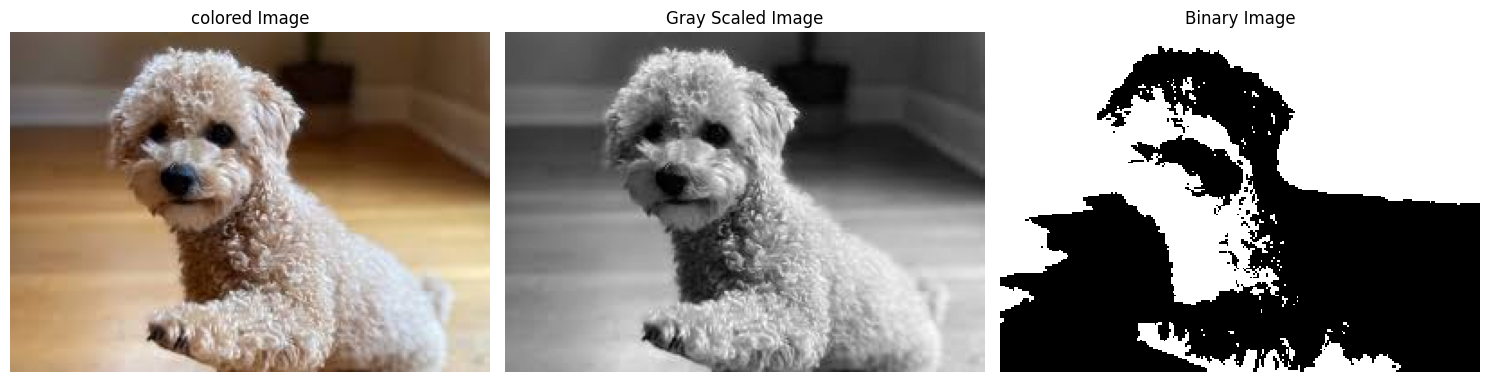

In [34]:
# Load an image in BGR format
image_bgr = cv.imread('pet_image.jpeg') # you can use anypath if you want to use it for your images

# Convert BGR to RGB for displaying with Matplotlib
image_rgb = cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB)

grey_scaled_image = cv.cvtColor(image_rgb, cv.COLOR_BGR2GRAY)
_, binary_image = cv.threshold(grey_scaled_image, 128, 255, cv.THRESH_BINARY)
images = [image_rgb, grey_scaled_image, binary_image]



fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image_rgb)
axes[0].set_title('colored Image')
axes[0].axis('off')  # Hide axes for a cleaner look

axes[1].imshow(grey_scaled_image,cmap= plt.cm.gray)
axes[1].set_title('Gray Scaled Image')
axes[1].axis('off')

axes[2].imshow(binary_image, cmap=plt.cm.binary, interpolation='nearest')
axes[2].set_title('Binary Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()

### Image Formats

 OpenCV supports various formats such as JPEG, PNG, BMP, etc. Here's how you can save an image in different formats:

In [16]:
# Save the image in different formats
cv.imwrite('image_output.png', image_bgr)  # this saves the image as PNG
cv.imwrite('image_output.jpg', image_bgr)  # this saves the image as JPG

True

## 2. Image Manipulation
### Resizing an Image

Resizing is essential for reducing the size of an image or for scaling purposes.

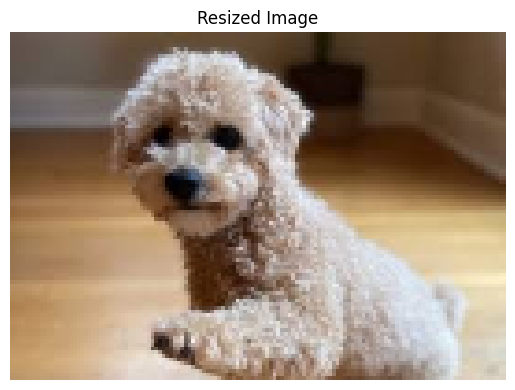

In [18]:
# Resize the image to half its original dimensions
image_resized = cv.resize(image_rgb, (0, 0), fx=0.5, fy=0.5)

# Display resized image
plt.imshow(image_resized)
plt.title('Resized Image')
plt.axis('off')
plt.show()



In [19]:
#lets have a look at the original shape of the image and the shape after it has been resized

org_wid, org_hei, _ = image_bgr.shape
res_wid, res_hei , _ = image_resized.shape

print(f"the original size of the image was {org_wid}x{org_hei} and after resizing it is reduced to {res_wid}x{res_hei} ")

the original size of the image was 189x267 and after resizing it is reduced to 94x134 


### Cropping an Image

Cropping allows us to extract a region of interest (ROI) from an image.

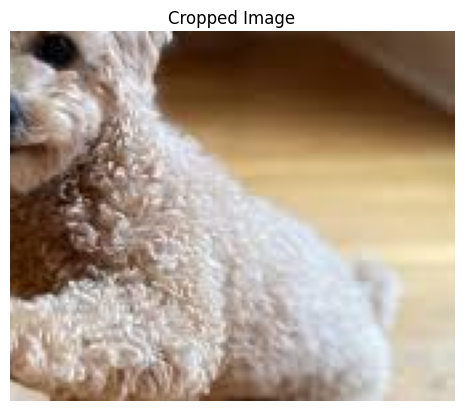

In [20]:
# Crop a region from the image
image_cropped = image_rgb[50:200, 100:300]  # Crop rows 50-200 and columns 100-300

# Display cropped image
plt.imshow(image_cropped)
plt.title('Cropped Image')
plt.axis('off')
plt.show()


## 3. Image Filtering

Image filtering allows for the enhancement or suppression of image features like noise or edges.

### Smoothing (Blurring)

Smoothing is used to reduce noise in the image. We will use a Gaussian filter here.

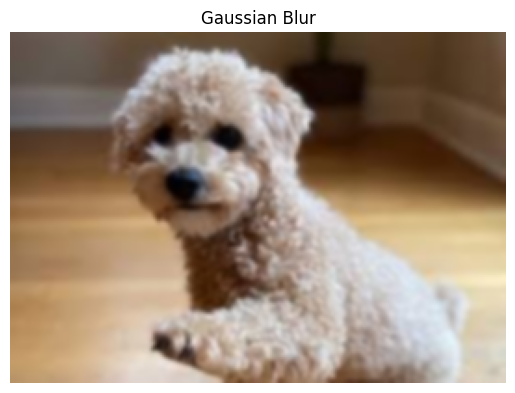

In [21]:
# Apply Gaussian blur
image_blurred = cv.GaussianBlur(image_rgb, (5, 5), 0)

# Display blurred image
plt.imshow(image_blurred)
plt.title('Gaussian Blur')
plt.axis('off')
plt.show()


### Sharpening

Sharpening enhances edges and other high-frequency components in the image.

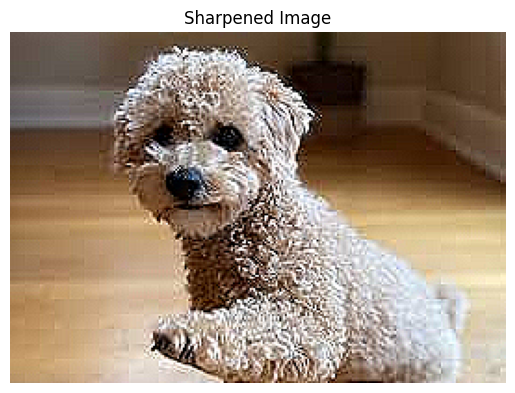

In [22]:
# Create sharpening kernel
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5,-1],
                           [0, -1, 0]])

# Apply the kernel to the image
image_sharpened = cv.filter2D(image_rgb, -1, sharpen_kernel)

# Display sharpened image
plt.imshow(image_sharpened)
plt.title('Sharpened Image')
plt.axis('off')
plt.show()


## 4. Histograms

Histograms are useful for analyzing the distribution of pixel intensities.

### Grayscale Histogram

# Convert the image to grayscale
image_gray = cv.cvtColor(image_bgr, cv.COLOR_BGR2GRAY)

# Compute the histogram
hist = cv.calcHist([image_gray], [0], None, [256], [0, 256])

# Plot the histogram

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].imshow(image_gray,cmap= plt.cm.gray)
axes[0].set_title('Gray Scaled Image')
axes[0].axis('off')

axes[1].plot(hist)
axes[1].set_title('colored Image')
axes[1].axis('off')  # Hide axes for a cleaner look



plt.tight_layout()
plt.show()

### Color Histogram

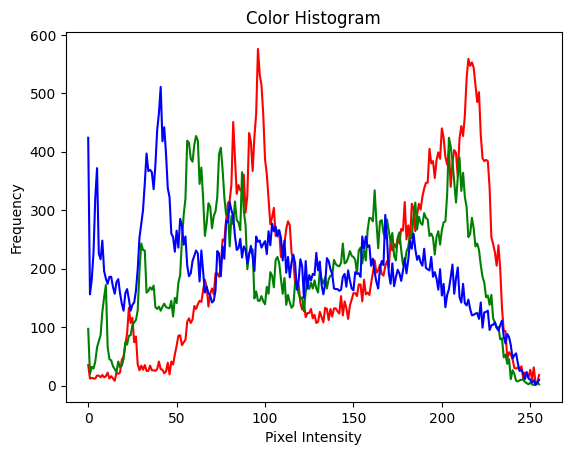

In [26]:
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv.calcHist([image_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)

plt.title('Color Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

## 5. Denoising

Denoising is essential for removing unwanted noise while preserving details in the image.

### Gaussian Filter for Denoising

Gaussian filtering is commonly used for reducing noise in images.


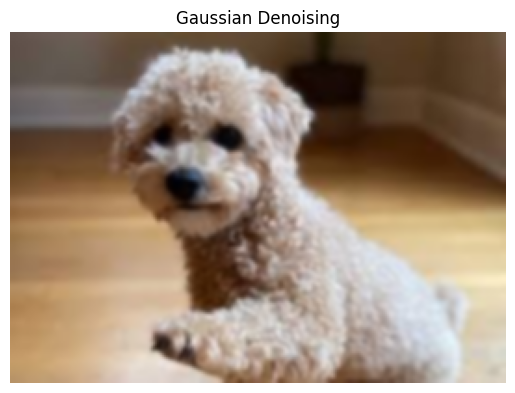

In [28]:
# Apply Gaussian filter for denoising
image_denoised_gaussian = cv.GaussianBlur(image_rgb, (5, 5), 0)

# Display Gaussian denoised image
plt.imshow(image_denoised_gaussian)
plt.title('Gaussian Denoising')
plt.axis('off')
plt.show()


### Median Filter for Denoising

Median filtering is particularly effective for reducing salt-and-pepper noise.

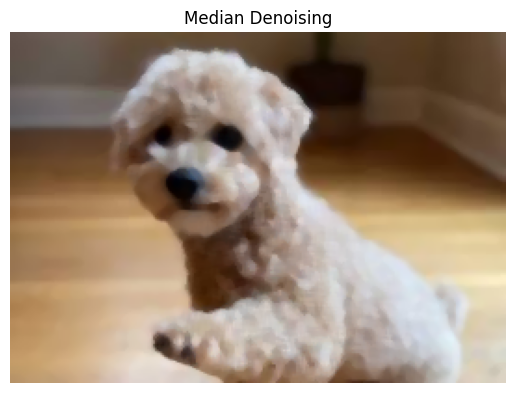

In [30]:
# Apply median filter for denoising
image_denoised_median = cv.medianBlur(image_rgb, 5)

# Display Median denoised image
plt.imshow(image_denoised_median)
plt.title('Median Denoising')
plt.axis('off')
plt.show()


## Conclusion

In this notebook, we explored various fundamental image processing tasks including image representation, manipulation (resizing and cropping), filtering (smoothing and sharpening), histogram analysis, and denoising using different filters.